In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

(334, 455)

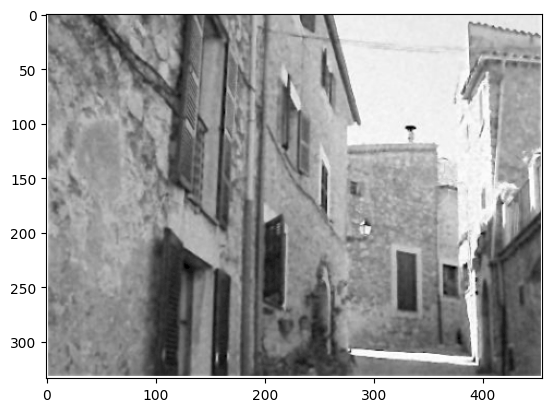

In [38]:
img = cv2.imread("data/NoisyTown.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = "gray")
img = img/255
img.shape

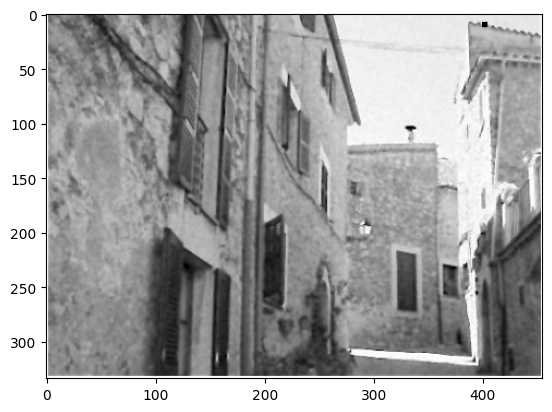

In [42]:
x, y = 400, 8
patches = []
showPatch = img.copy()
showPatch[0 + y: 5 + y, 0 + x: 5 + x] = 0
patches.append(img[0 + y: 5 + y, 0 + x: 5 + x].copy())
plt.imshow(showPatch, cmap = 'gray')

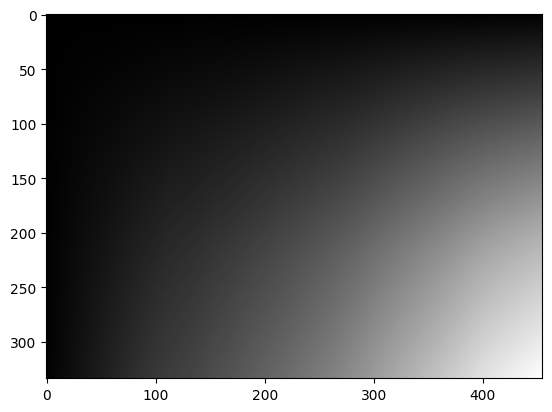

In [41]:
iImg = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        s = img[i, j]
        if i: s += iImg[i - 1][j]
        if j: s += iImg[i][j - 1]
        if j and i: s -= iImg[i - 1, j - 1]
        iImg[i, j] = s
plt.imshow(iImg, cmap = "gray")

In [43]:
for p in patches:
    threshold = p.shape[0]*p.shape[1] / 100
    s = np.sum(p)
    for i in range(iImg.shape[0] + 1 - p.shape[0]):
        for j in range(iImg.shape[1] + 1 - p.shape[1]):
            sU = iImg[i + p.shape[0], j + p.shape[1]]
            if i: sU -= iImg[i - 1, j + p.shape[1]]
            if j: sU -= iImg[i + p.shape[0], j - 1]
            if i and j: sU += iImg[i - 1, j - 1]

            if np.abs((sU - s)) < threshold:





SyntaxError: invalid syntax (3399464808.py, line 2)